In [11]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from mpl_toolkits import mplot3d
plt.rc('font', family='serif')
import matplotlib
matplotlib.rcParams.update({'legend.fontsize': 16})
matplotlib.rcParams.update({'font.size': 16})

In [3]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))

train_x, train_y = cf.data_normaliser(df_pions[:-1000,:-1]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:-1]), df_pions[-1000:,-1]


In [4]:
def lr_test(learning_rates,repeats):
    no_optimsier = len(learning_rates)
    is_last_val_bool = np.zeros(no_optimsier)
    min_mape = np.zeros((no_optimsier,repeats))
    for i in range(no_optimsier):
        opt = keras.optimizers.Adam(learning_rate= learning_rates[i], beta_1 = 0.9, beta_2= 0.99)
        print('learning rate =',learning_rates[i])
        last_val_bool = 0
        for j in range(repeats):
            df = pd.DataFrame(cf.trained_network(train_x,train_y,val_x,val_y,[512,512], optimizer= opt, verbose= 0,epochs = 100, batch_size= 256).history)
            val_mape_ar_smoothed = cf.exponetial_smoothing(np.array(df['val_mean_absolute_percentage_error']),0.4)
            loss_ar_smoothed = cf.exponetial_smoothing(np.array(df['loss']),0.4)
            min_mape[i,j] = np.min(val_mape_ar_smoothed)
            if cf.neg_grad_tester(val_mape_ar_smoothed,loss_ar_smoothed):
                last_val_bool +=1
                print('Negative Grad Identified')
            else:
                pass
        if last_val_bool >= repeats/4:
            is_last_val_bool[i] = 1
        else:
            is_last_val_bool[i] = 0
    return min_mape, is_last_val_bool

In [5]:
lrs = np.logspace(-4,-1,20)

In [5]:
min_mape ,bool = lr_test(lrs,10)



learning rate = 0.0001


2021-12-08 17:22:21.459370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 17:22:21.463669: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 17:22:21.463903: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 17:22:21.464447: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
learning rate = 0.0001438449888287663
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
learning rate = 0.00020691380811147902
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
learning rate = 0.00029763514416313193
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative 

In [16]:
def return_not_convergerd(x,z,bools): 
    if bools.shape != z.shape:
        print('wrong size input')
    indecies = np.where(z*bools != 0)
 
    unconverged_z = []
    unconverged_x =[]
    for i in range(len(indecies)):
        print(indecies[i])
        unconverged_z.append(z[(indecies[i])])
        unconverged_x.append(x[(indecies[i])])
    return unconverged_x  , unconverged_z
unc_x,unc_z = return_not_convergerd(lrs,mean_min_mape,bool)
print(unc_x,unc_z)

[0 1 2 3 4 5]
[array([0.0001    , 0.00014384, 0.00020691, 0.00029764, 0.00042813,
       0.00061585])] [array([16.8447306 , 10.4589519 ,  6.54327312,  4.7792053 ,  3.99566268,
        3.95391249])]


<ErrorbarContainer object of 3 artists>

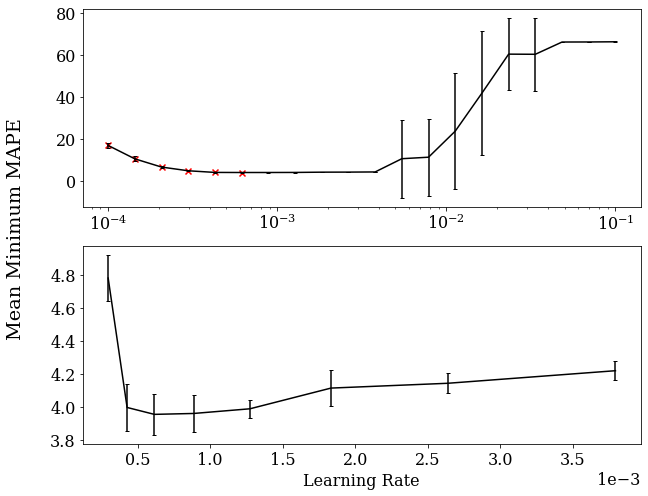

In [38]:
mean_min_mape = np.mean(min_mape,axis = 1)

ste = np.std(min_mape,axis = 1)

fig, ax = plt.subplots(2,1,figsize= (10,8))

ax[0].scatter(lrs[:6],mean_min_mape[:6], c = 'red', marker= 'x')
ax[0].errorbar(lrs,mean_min_mape,ste,capsize= 2,c = 'black')
ax[0].set_xscale('log')
fig.supylabel('Mean Minimum MAPE')
ax[1].set_xlabel('Learning Rate')
ax[1].ticklabel_format(axis = 'x', style = 'sci', scilimits = (-3,-3))
#ax[0].set_xlabel('Learning Rate')
### zoom
gz_lr = lrs[np.where(mean_min_mape<5)]
gz_mape = mean_min_mape[np.where(mean_min_mape<5)]
gz_ste = ste[np.where(mean_min_mape<5)]
###
ax[1].errorbar(gz_lr,gz_mape,gz_ste, c = 'black', capsize= 2)


In [39]:
np.savetxt('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Sean_Working_Notebooks/Testing_Notebooks/Testing_Data/lr/learningrate.csv',min_mape)
fig.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/learningrate.png',dpi = 300,transparent= False)

In [6]:
min_mape  = np.loadtxt('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Sean_Working_Notebooks/Testing_Notebooks/Testing_Data/lr/learningrate.csv')

<ErrorbarContainer object of 3 artists>

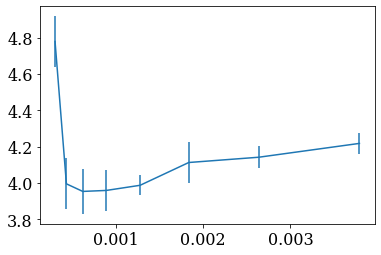

In [19]:
gz_lr = lrs[np.where(mean_min_mape<5)]
gz_mape = mean_min_mape[np.where(mean_min_mape<5)]
gz_ste = ste[np.where(mean_min_mape<5)]
plt.
